In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

In [4]:
df = pd.read_csv('duplicate_question_pair_train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
df.shape

(404290, 6)

In [13]:
new_df = df.sample(100000,random_state=2)
new_df.shape


(100000, 6)

In [14]:
def preprocess(q):

    q=str(q).lower().strip()
    q=BeautifulSoup(q)
    q=q.get_text()

    q=q.replace("%"," percent")
    q=q.replace("$"," dollar ")
    q=q.replace("₹"," ruppees ")
    q=q.replace("€"," euro ")
    q=q.replace("@"," at ")
    q=q.replace("&"," and ")

    q=q.replace("[math]","")

    q=q.replace(",000,000,000","b")
    q=q.replace(",000,000","m")
    q=q.replace(",000","k")
    q=re.sub(r"([0-9]+)000000000",r"\1b",q)
    q=re.sub(r"([0-9]+)000000",r"\1m",q)
    q=re.sub(r"([0-9]+)000",r"\1k",q)
    contractions= {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
   }
    q_decontracted=[]

    for word in q.split():
      if word in contractions:

        word=contractions[word]

      q_decontracted.append(word)


    q=" ".join(q_decontracted)
    q=str(q).lower().strip()
    q=q.replace("'ve"," have")
    q=q.replace("n't"," not")
    q=q.replace("'re"," are")
    q=q.replace("'ll"," will")


    pattern=re.compile("\W")
    q=re.sub(pattern," ",q).strip()

    return q

    

In [15]:
new_df["question1"]=new_df["question1"].apply(preprocess)
new_df["question2"]=new_df["question2"].apply(preprocess)

C:\Users\HP\AppData\Local\Temp\ipykernel_6076\2701674412.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q=BeautifulSoup(q)


In [18]:
new_df.head()
new_df.shape

(100000, 6)

In [19]:
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [20]:

new_df["q1_num_words"]=new_df["question1"].apply(lambda row: len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row: len(row.split(" ")))

In [21]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1 & w2)

In [22]:
new_df["common_words"]=new_df.apply(common_words,axis=1)

In [23]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip() , row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip() , row["question2"].split(" ")))
    return len(w1) + len(w2)

In [24]:

new_df["total_words"]=new_df.apply(total_words,axis=1)

In [25]:

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [26]:
new_df["word_share"]=round(new_df["common_words"]/new_df['total_words']*100,2)

In [27]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,46.15
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,33.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,10.53
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,2.94
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,23.08


In [17]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [28]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1=row["question1"]
    q2=row["question2"]
    STOP_WORDS=stopwords.words("english")
    SAFE_DIV=0.0001
    token_features=[0.0]*8

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    if (len(q1_tokens)==0 or (len(q2_tokens)==0)):
        return token_features

    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])


    q1_stop=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop=set([word for word in q2_tokens if word in STOP_WORDS])

    common_word_count=len(q1_words.intersection(q2_words))


    common_stop_count=len(q1_stop.intersection(q2_stop))


    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0]=common_word_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[1]=common_word_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[2]=common_stop_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[3]=common_stop_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens)+SAFE_DIV))
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens)+SAFE_DIV))

    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])

    token_features[7]=int(q1_tokens[0]==q2_tokens[0])

    return token_features

In [30]:
token_features=new_df.apply(fetch_token_features,axis=1)

new_df["cwc_min"] = list(map(lambda x : x[0], token_features))
new_df["cwc_max"] = list(map(lambda x : x[1] ,token_features))
new_df["csc_min"] = list(map(lambda x : x[2], token_features))
new_df["csc_max"] = list(map(lambda x : x[3], token_features))
new_df["ctc_min"] = list(map(lambda x : x[4], token_features))
new_df["ctc_max"] = list(map(lambda x : x[5], token_features))
new_df["last_word_eq"] = list(map(lambda x : x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x : x[7], token_features))

In [31]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,46.15,0.538462,0.538457,0.384615,0.384612,0.923077,0.923070,1,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,24,33.33,0.230769,0.187499,0.384615,0.312498,0.615385,0.499997,1,1
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,38,10.53,0.047619,0.035714,0.142856,0.107143,0.190475,0.142857,0,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,34,2.94,0.071429,0.031250,0.000000,0.000000,0.071429,0.031250,0,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,23.08,0.600000,0.333330,0.000000,0.000000,0.600000,0.333330,1,0


In [32]:
new_df.shape

(100000, 21)

In [22]:
%pip install distance

Note: you may need to restart the kernel to use updated packages.


In [33]:

import distance
def fetch_length_features(row):
    q1=row["question1"]
    q2=row["question2"]

    q1_tokens=q1.split(" ")
    q2_tokens=q2.split(" ")

    length_features=[0.0]*3

    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features

    #abs length
    length_features[0]= abs(len(q1_tokens)-len(q2_tokens))

    #avg length
    length_features[1] = (len(q1_tokens)+len(q2_tokens)) / 2

    strs=list(distance.lcsubstrings(q1,q2))
    try:
        length_features[2]=len(strs[0])/(min(len(q1) ,len(q2))+1)
    except:
        length_features[2]=0

    return length_features

In [34]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.538457,0.384615,0.384612,0.923077,0.923070,1,1,0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.187499,0.384615,0.312498,0.615385,0.499997,1,1,3,14.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.035714,0.142856,0.107143,0.190475,0.142857,0,0,7,24.5,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.031250,0.000000,0.000000,0.071429,0.031250,0,0,18,23.0,0.050847
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,0.000000,0.000000,0.600000,0.333330,1,0,4,7.0,0.542857


In [26]:
%pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [36]:

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1=row["question1"]
    q2=row["question2"]

    fuzzy_features=[0.0]*4

    fuzzy_features[0]=fuzz.QRatio(q1,q2)

    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)

    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)

    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

c:\Users\HP\anaconda3\envs\py310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [37]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

new_df["fuzz_ratio"]=list(map(lambda x:x[0],fuzzy_features))
new_df["fuzz_partial_ratio"]=list(map(lambda x:x[1],fuzzy_features))
new_df["token_sort_ratio"]=list(map(lambda x:x[2],fuzzy_features))
new_df["token_set_ratio"]=list(map(lambda x:x[3],fuzzy_features))

In [38]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1,1,0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.499997,1,1,3,14.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.142857,0,0,7,24.5,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.031250,0,0,18,23.0,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1,0,4,7.0,0.542857,55,70,48,69


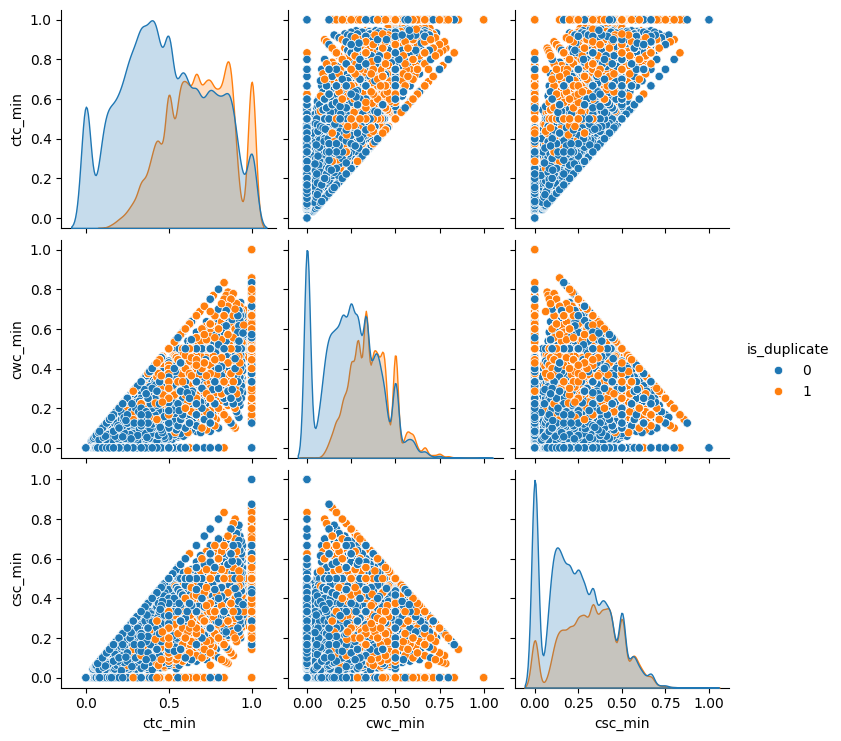

In [30]:
sns.pairplot(new_df[["ctc_min","cwc_min","csc_min","is_duplicate"]],hue= "is_duplicate")

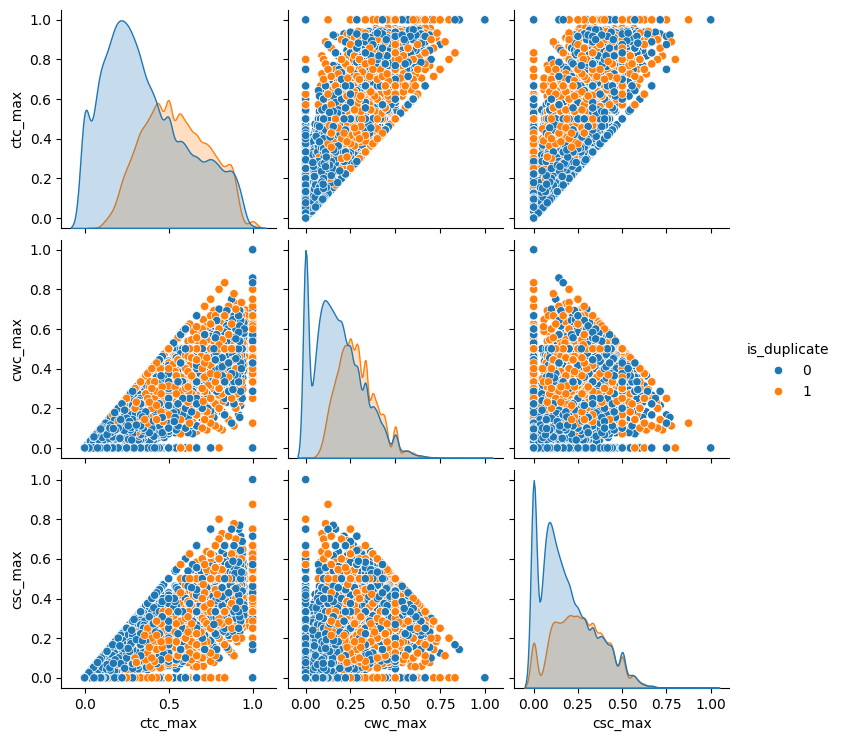

In [31]:
sns.pairplot(new_df[["ctc_max","cwc_max","csc_max","is_duplicate"]],hue= "is_duplicate")

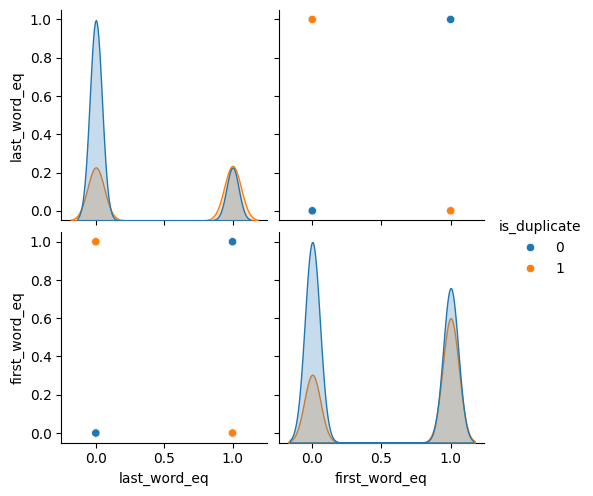

In [32]:
sns.pairplot(new_df[["last_word_eq","first_word_eq","is_duplicate"]],hue= "is_duplicate")

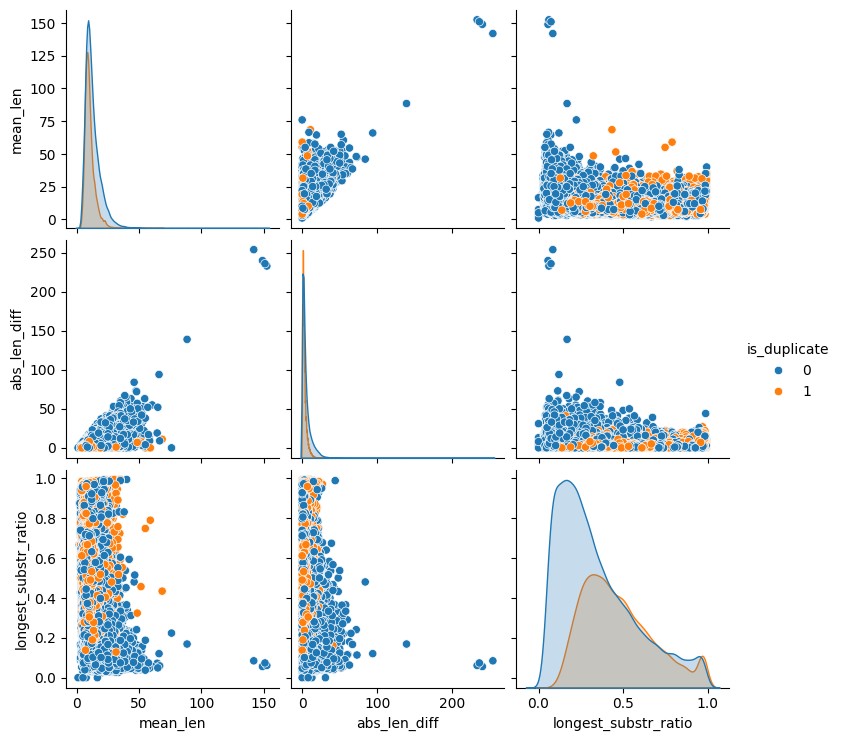

In [33]:
sns.pairplot(new_df[["mean_len","abs_len_diff","longest_substr_ratio","is_duplicate"]],hue= "is_duplicate")

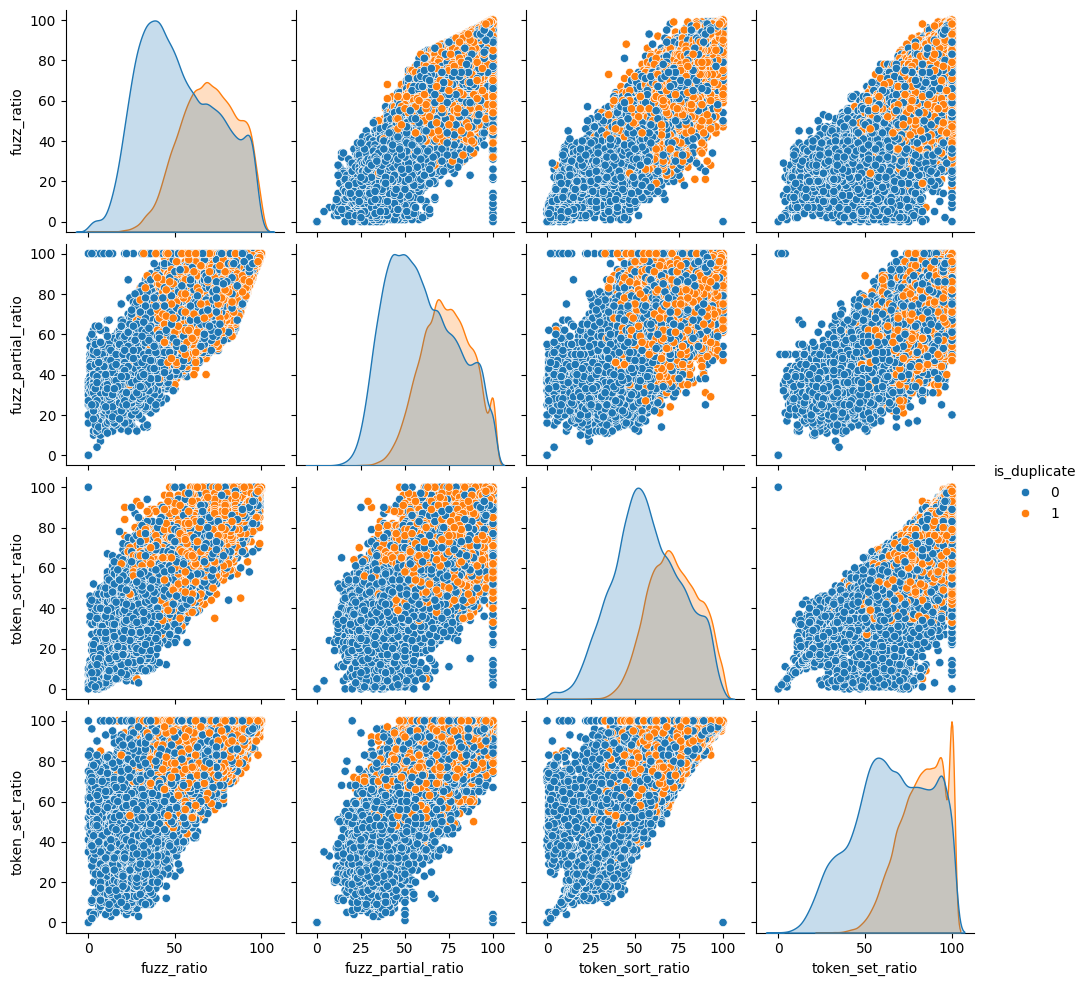

In [34]:
sns.pairplot(new_df[["fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio","is_duplicate"]],hue= "is_duplicate")

scaling all the columns

In [26]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(new_df[["cwc_min","cwc_max","csc_min","csc_max","ctc_min","ctc_max","last_word_eq","first_word_eq","mean_len","abs_len_diff","longest_substr_ratio","fuzz_ratio","fuzz_partial_ratio","token_sort_ratio","token_set_ratio"]])
y=new_df["is_duplicate"].values

In [39]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [40]:
ques_df.shape

(100000, 2)

In [41]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(100000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_words,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,75,76,13,13,12,26,46.15,0.538462,0.538457,...,0.923070,1,1,0,13.0,0.855263,99,99,99,99
115086,0,48,56,13,16,8,24,33.33,0.230769,0.187499,...,0.499997,1,1,3,14.5,0.224490,69,67,65,74
327711,0,104,119,28,21,4,38,10.53,0.047619,0.035714,...,0.142857,0,0,7,24.5,0.047619,26,29,34,43
367788,0,58,145,14,32,1,34,2.94,0.071429,0.031250,...,0.031250,0,0,18,23.0,0.050847,29,41,23,30
151235,0,34,49,5,9,3,13,23.08,0.600000,0.333330,...,0.333330,1,0,4,7.0,0.542857,55,70,48,69


In [39]:
import joblib

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import joblib

# Combine the questions into a single corpus to fit the vectorizer on shared vocabulary
combined_questions = pd.concat([ques_df['question1'], ques_df['question2']])

# Initialize and fit the vectorizer
cv = CountVectorizer(max_features=1500)
cv.fit(combined_questions)

# Transform each question using the same vectorizer
q1_vect = cv.transform(ques_df['question1']).toarray()
q2_vect = cv.transform(ques_df['question2']).toarray()

# Save the trained vectorizer
joblib.dump(cv, 'count_vectorizer1.pkl')

# Create DataFrames for each question vector
temp_df1 = pd.DataFrame(q1_vect, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_vect, index=ques_df.index)

# Concatenate the two DataFrames column-wise
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

temp_df


,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
353951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150383,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
vectorizer_features_and_manual_features = pd.concat([temp_df, final_df], axis=1)

In [45]:
vectorizer_features_and_manual_features.shape

(100000, 3023)

In [47]:
vectorizer_features_and_manual_features.head()

,0,1,2,3,4,5,6,7,8,9,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,0,0,0,0,0,0,0,0,0,0,...,0.923070,1,1,0,13.0,0.855263,99,99,99,99
115086,0,0,0,0,0,0,0,0,0,0,...,0.499997,1,1,3,14.5,0.224490,69,67,65,74
327711,0,0,0,0,0,0,0,0,0,0,...,0.142857,0,0,7,24.5,0.047619,26,29,34,43
367788,0,0,0,0,0,0,0,0,0,0,...,0.031250,0,0,18,23.0,0.050847,29,41,23,30
151235,0,0,0,0,0,0,0,0,0,0,...,0.333330,1,0,4,7.0,0.542857,55,70,48,69


In [48]:


# Assuming your DataFrame is called `df`
vectorizer_features_and_manual_features.to_csv('vectorizer_features_and_manual_features.csv', index=False)  # index=False prevents saving row indices


(404290, 6)

In [43]:
from sklearn.model_selection import train_test_split

# Separate features and target by column names
X = combined_df.drop(columns=['is_duplicate']).values  # Exclude the target column
y = combined_df['is_duplicate'].values  # Select only the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [48]:
X_train.shape

(80000, 3022)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.7995
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     12626
           1       0.74      0.70      0.72      7374

    accuracy                           0.80     20000
   macro avg       0.79      0.78      0.78     20000
weighted avg       0.80      0.80      0.80     20000



In [45]:

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved as 'random_forest_model.pkl'")

Model saved as 'random_forest_model.pkl'


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBClassifier
xgb_model = XGBClassifier(random_state=1)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Test Accuracy (XGBoost): {xgb_accuracy:.4f}")

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred_xgb))


Test Accuracy (XGBoost): 0.7962
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     12626
           1       0.73      0.72      0.72      7374

    accuracy                           0.80     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.80      0.80      0.80     20000



In [47]:

# Save the trained model to a file
joblib.dump(rf_model, 'XG.pkl')

print("Model saved as 'XG.pkl'")

Model saved as 'XG.pkl'
